<a href="https://colab.research.google.com/github/MasudurRahman34/Machine-Learning/blob/main/Machine-Learning/Supervised/Regression/Logistic%20Regression/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#defining feature columns
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X=df[features]
y=df.Outcome

In [5]:
#spiliting dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X1=scaler.fit_transform(X)


In [6]:
#spiliting dataset
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train,y_test= train_test_split(X1,y, test_size=.25, random_state=0)

In [7]:
#train model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X1_train,y_train)
y_pred=logreg.predict(X1_test)

In [9]:
#model evaluation using confusion matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

0.8020833333333334
[[118  12]
 [ 26  36]]


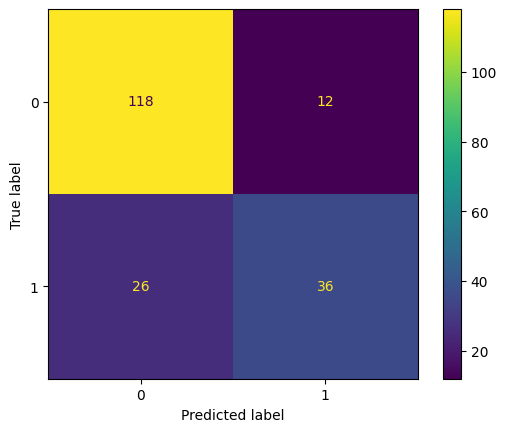

In [14]:
#Visualizing Confusion Matrix using Heatmap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()


In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


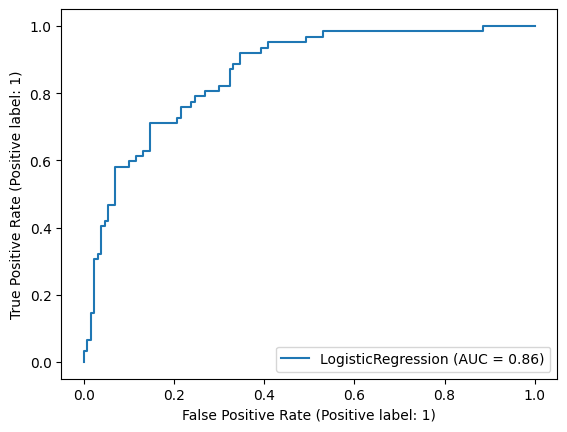

In [16]:
from sklearn.metrics import RocCurveDisplay
logreg = RocCurveDisplay.from_estimator(logreg, X1_test, y_test)
